# Encoding approach - Integer encoding with simple RNN

In [2]:
import os
import numpy as np
import pandas as pd

In [4]:
docs = ['Hi, my name is Sundram','NLP is in demand','GENAI is part of NLP',
        'If you want to do a career transition in GenAI domain, you should know NLP',
        'AI is a big buzz word','All the organization are looking GenAI skillsets nowadays',
        'ExcelR provides classes for GenAI','You all folks are simply amazing',
        'Because you are upgrading market trend skillset', 
        'I am really enjoying to share my knowledge with you all']
docs

['Hi, my name is Sundram',
 'NLP is in demand',
 'GENAI is part of NLP',
 'If you want to do a career transition in GenAI domain, you should know NLP',
 'AI is a big buzz word',
 'All the organization are looking GenAI skillsets nowadays',
 'ExcelR provides classes for GenAI',
 'You all folks are simply amazing',
 'Because you are upgrading market trend skillset',
 'I am really enjoying to share my knowledge with you all']

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<out_of_vocab>')
tokenizer.fit_on_texts(docs)
tokenizer.word_index                  

{'<out_of_vocab>': 1,
 'you': 2,
 'is': 3,
 'genai': 4,
 'nlp': 5,
 'all': 6,
 'are': 7,
 'my': 8,
 'in': 9,
 'to': 10,
 'a': 11,
 'hi': 12,
 'name': 13,
 'sundram': 14,
 'demand': 15,
 'part': 16,
 'of': 17,
 'if': 18,
 'want': 19,
 'do': 20,
 'career': 21,
 'transition': 22,
 'domain': 23,
 'should': 24,
 'know': 25,
 'ai': 26,
 'big': 27,
 'buzz': 28,
 'word': 29,
 'the': 30,
 'organization': 31,
 'looking': 32,
 'skillsets': 33,
 'nowadays': 34,
 'excelr': 35,
 'provides': 36,
 'classes': 37,
 'for': 38,
 'folks': 39,
 'simply': 40,
 'amazing': 41,
 'because': 42,
 'upgrading': 43,
 'market': 44,
 'trend': 45,
 'skillset': 46,
 'i': 47,
 'am': 48,
 'really': 49,
 'enjoying': 50,
 'share': 51,
 'knowledge': 52,
 'with': 53}

In [8]:
tokenizer.word_counts

OrderedDict([('hi', 1),
             ('my', 2),
             ('name', 1),
             ('is', 4),
             ('sundram', 1),
             ('nlp', 3),
             ('in', 2),
             ('demand', 1),
             ('genai', 4),
             ('part', 1),
             ('of', 1),
             ('if', 1),
             ('you', 5),
             ('want', 1),
             ('to', 2),
             ('do', 1),
             ('a', 2),
             ('career', 1),
             ('transition', 1),
             ('domain', 1),
             ('should', 1),
             ('know', 1),
             ('ai', 1),
             ('big', 1),
             ('buzz', 1),
             ('word', 1),
             ('all', 3),
             ('the', 1),
             ('organization', 1),
             ('are', 3),
             ('looking', 1),
             ('skillsets', 1),
             ('nowadays', 1),
             ('excelr', 1),
             ('provides', 1),
             ('classes', 1),
             ('for', 1),
             ('folk

In [10]:
tokenizer.document_count

10

In [12]:
docs

['Hi, my name is Sundram',
 'NLP is in demand',
 'GENAI is part of NLP',
 'If you want to do a career transition in GenAI domain, you should know NLP',
 'AI is a big buzz word',
 'All the organization are looking GenAI skillsets nowadays',
 'ExcelR provides classes for GenAI',
 'You all folks are simply amazing',
 'Because you are upgrading market trend skillset',
 'I am really enjoying to share my knowledge with you all']

In [14]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[12, 8, 13, 3, 14],
 [5, 3, 9, 15],
 [4, 3, 16, 17, 5],
 [18, 2, 19, 10, 20, 11, 21, 22, 9, 4, 23, 2, 24, 25, 5],
 [26, 3, 11, 27, 28, 29],
 [6, 30, 31, 7, 32, 4, 33, 34],
 [35, 36, 37, 38, 4],
 [2, 6, 39, 7, 40, 41],
 [42, 2, 7, 43, 44, 45, 46],
 [47, 48, 49, 50, 10, 51, 8, 52, 53, 2, 6]]

In [16]:
tokenizer.word_index 

{'<out_of_vocab>': 1,
 'you': 2,
 'is': 3,
 'genai': 4,
 'nlp': 5,
 'all': 6,
 'are': 7,
 'my': 8,
 'in': 9,
 'to': 10,
 'a': 11,
 'hi': 12,
 'name': 13,
 'sundram': 14,
 'demand': 15,
 'part': 16,
 'of': 17,
 'if': 18,
 'want': 19,
 'do': 20,
 'career': 21,
 'transition': 22,
 'domain': 23,
 'should': 24,
 'know': 25,
 'ai': 26,
 'big': 27,
 'buzz': 28,
 'word': 29,
 'the': 30,
 'organization': 31,
 'looking': 32,
 'skillsets': 33,
 'nowadays': 34,
 'excelr': 35,
 'provides': 36,
 'classes': 37,
 'for': 38,
 'folks': 39,
 'simply': 40,
 'amazing': 41,
 'because': 42,
 'upgrading': 43,
 'market': 44,
 'trend': 45,
 'skillset': 46,
 'i': 47,
 'am': 48,
 'really': 49,
 'enjoying': 50,
 'share': 51,
 'knowledge': 52,
 'with': 53}

In [18]:
from keras.utils import pad_sequences

In [20]:
seq1 = pad_sequences(sequences, padding='pre')
seq2 = pad_sequences(sequences, padding='post')

In [22]:
seq1

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  8, 13,  3, 14],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  3,  9, 15],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  3, 16, 17,  5],
       [18,  2, 19, 10, 20, 11, 21, 22,  9,  4, 23,  2, 24, 25,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  3, 11, 27, 28, 29],
       [ 0,  0,  0,  0,  0,  0,  0,  6, 30, 31,  7, 32,  4, 33, 34],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 35, 36, 37, 38,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  6, 39,  7, 40, 41],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 42,  2,  7, 43, 44, 45, 46],
       [ 0,  0,  0,  0, 47, 48, 49, 50, 10, 51,  8, 52, 53,  2,  6]])

In [24]:
seq2

array([[12,  8, 13,  3, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  3,  9, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  3, 16, 17,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [18,  2, 19, 10, 20, 11, 21, 22,  9,  4, 23,  2, 24, 25,  5],
       [26,  3, 11, 27, 28, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6, 30, 31,  7, 32,  4, 33, 34,  0,  0,  0,  0,  0,  0,  0],
       [35, 36, 37, 38,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  6, 39,  7, 40, 41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [42,  2,  7, 43, 44, 45, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [47, 48, 49, 50, 10, 51,  8, 52, 53,  2,  6,  0,  0,  0,  0]])

# Building Model - RNN

In [27]:
from keras import Sequential
from keras.layers import Dense, SimpleRNN

In [33]:
model = Sequential()
model.add(SimpleRNN(32, input_shape=(50,1)))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
1*32+32+32*32+32*1+1

1121

In [37]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(50,1)))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 64)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
1*64+64+64*64+64*1+1

4289

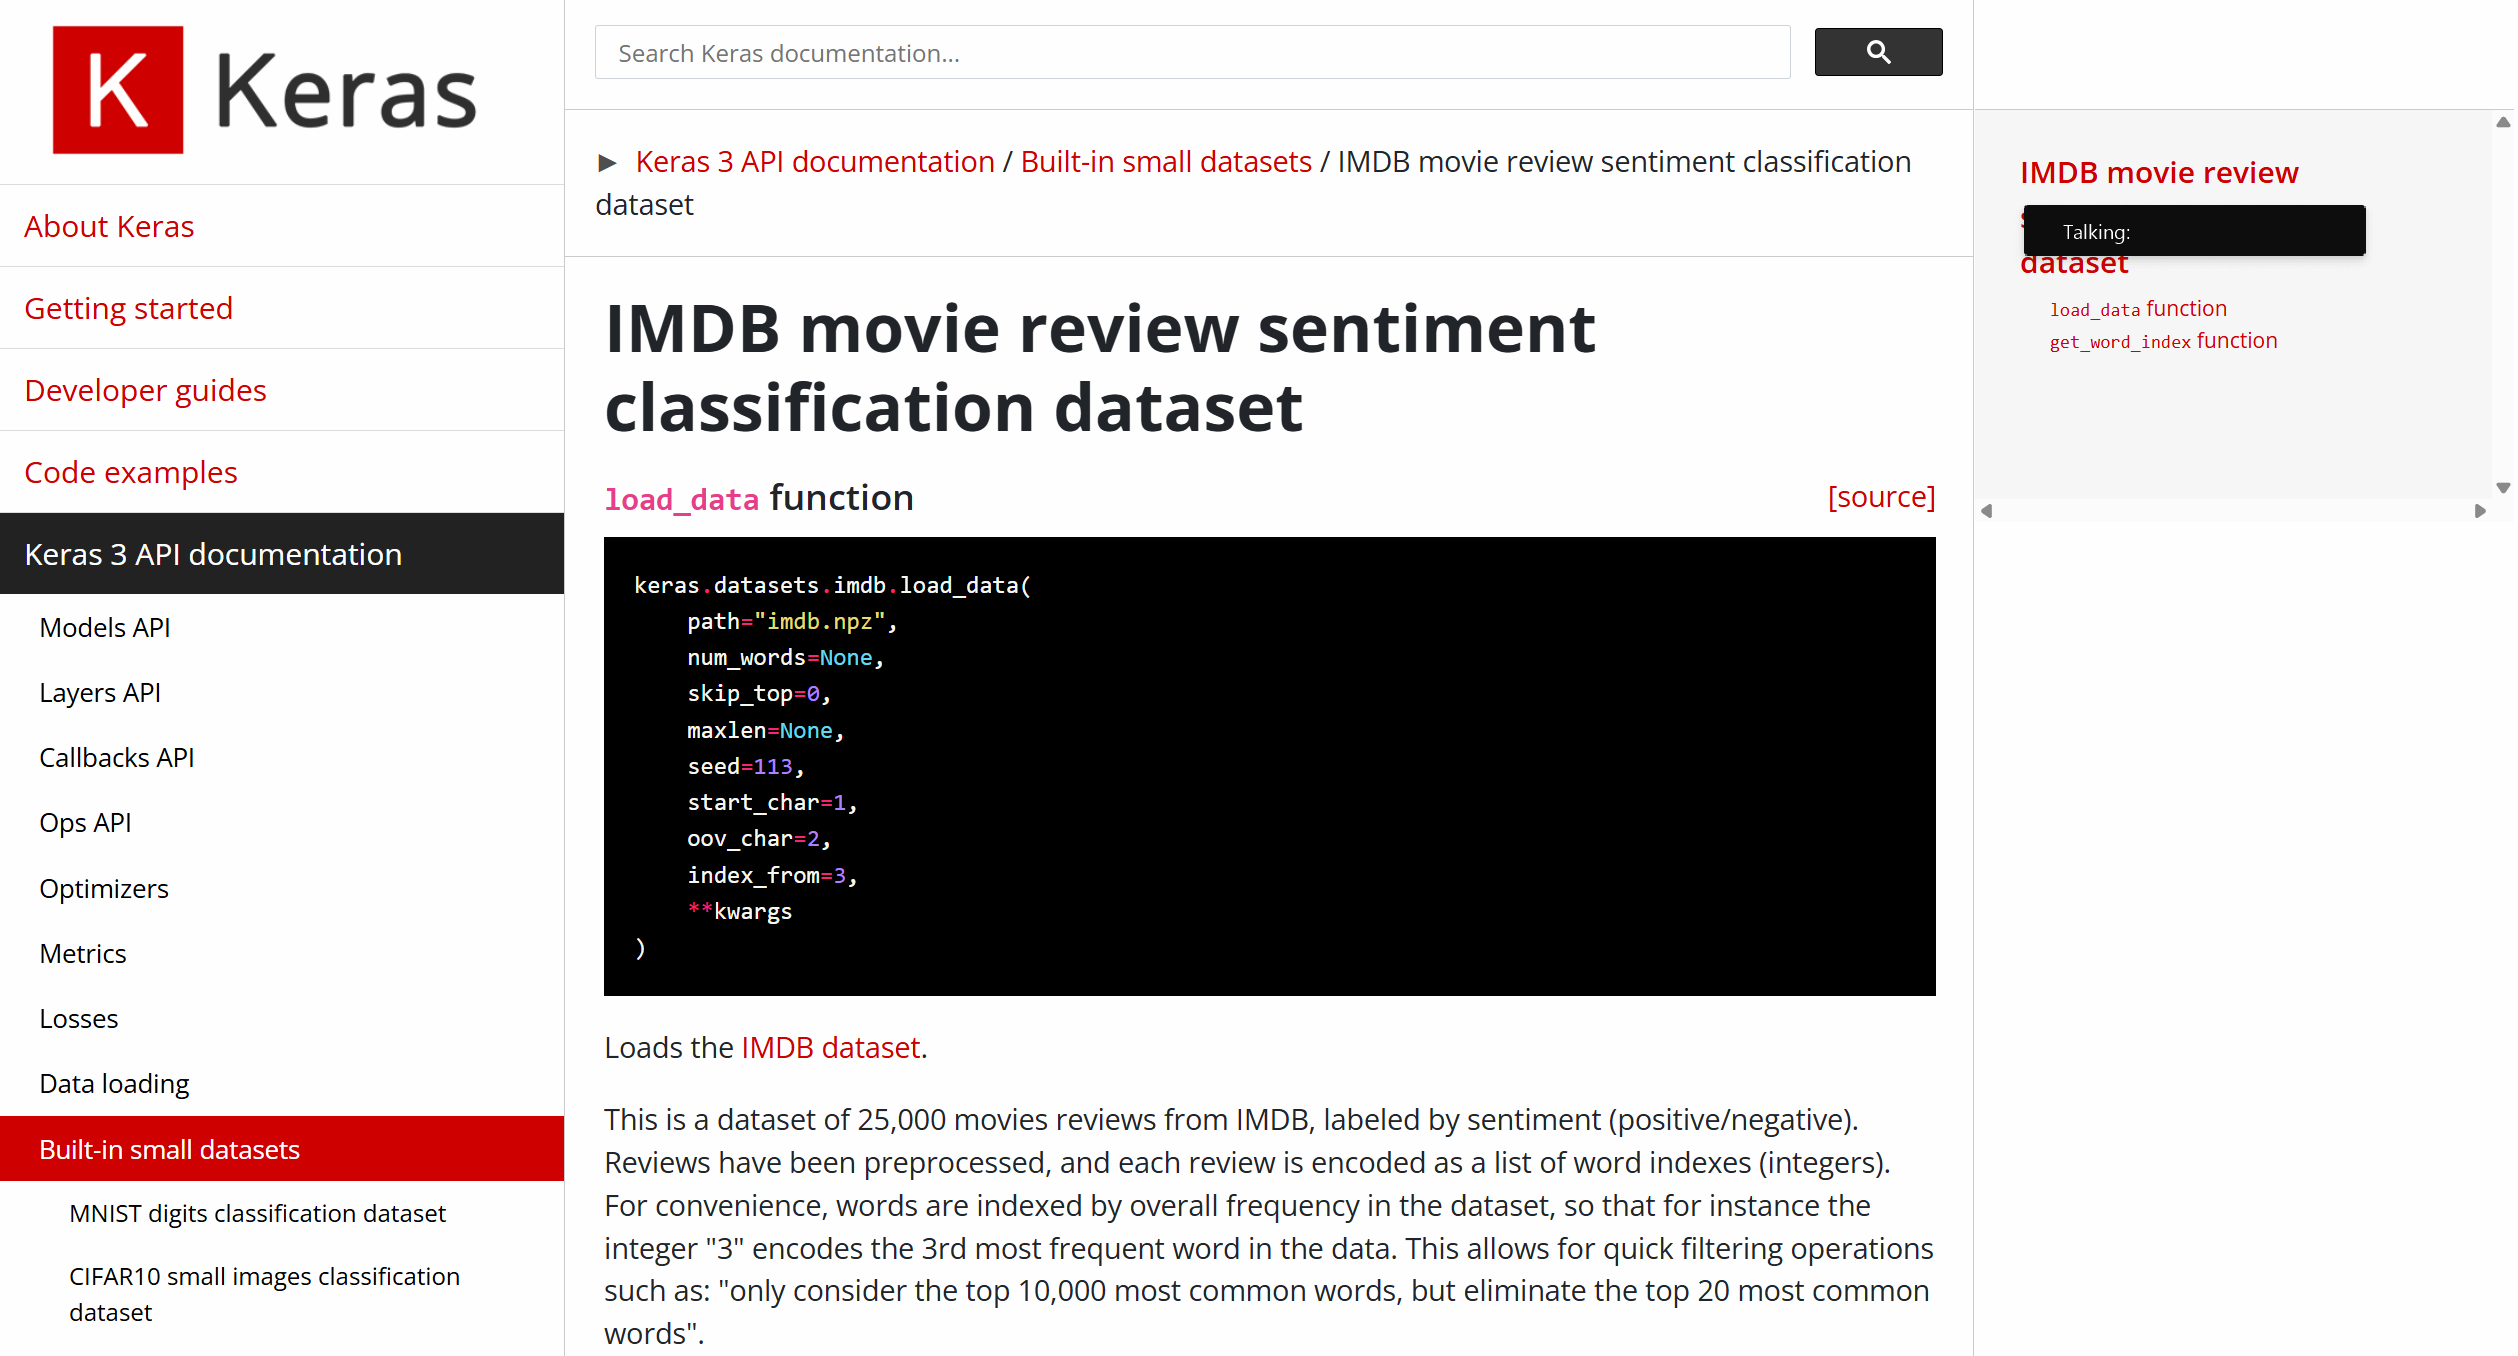

In [130]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding

In [132]:
max_features=10000
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=max_features)

In [133]:
y_train.shape

(25000,)

In [134]:
x_train.shape

(25000,)

In [135]:
x_test.shape

(25000,)

In [136]:
y_test.shape

(25000,)

In [137]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [138]:
len(x_train[0])

218

In [139]:
len(x_train[100])

158

In [140]:
len(x_train[2000])

109

In [141]:
len(x_train[22000])

222

In [142]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [143]:
reverse_word_index = {value : key for key, value in word_index.items()}
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [144]:
sample_review = x_train[100]
sample_label = y_train[100]

In [145]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sample_review])
decoded_review

"? i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of ? drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was ? on the public under the name of david lynch to make a few bucks too let me make it clear that i didn't care about the foul language part but had to keep ? the sound because my neighbors might have all in all this is a highly disappointing release and may well have just been left in the ? box set as a curiosity i highly recommend you don't spend your money on this 2 out of 10"

In [146]:
max_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = sequence.pad_sequences(x_test, maxlen=max_length, padding='post')

In [147]:
print(len(x_train[0]))
print(len(x_train[1000]))
print(len(x_train[5500]))
print(len(x_train[10000]))
print(len(x_train[23500]))

500
500
500
500
500


In [154]:
25000*2494*32*1000

1995200000

In [163]:
x_train[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

# Building Embedding RNN method

In [170]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [172]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_length))
model.add(SimpleRNN(128, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.build(input_shape=(None, max_length))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

D:\software\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [174]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
earlystopping

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32,validation_split=0.2, callbacks=[earlystopping])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 83ms/step - accuracy: 0.5068 - loss: 0.6929 - val_accuracy: 0.4986 - val_loss: 0.6911
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 79ms/step - accuracy: 0.5244 - loss: 0.7235 - val_accuracy: 0.5138 - val_loss: 0.6916
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.5279 - loss: 89679749120.0000 - val_accuracy: 0.5016 - val_loss: 0.6896
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.5348 - loss: 36.2607 - val_accuracy: 0.5010 - val_loss: 0.7154
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 81ms/step - accuracy: 0.5249 - loss: 0.6736 - val_accuracy: 0.5008 - val_loss: 0.6918
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 81ms/step - accuracy: 0.5316 - loss: 45720152.0000 - val_accuracy: 0.5076 - val_loss: 0.6912
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.5343 - loss: 0.6650 - val_accuracy: 0.5100 - val_loss: 0.6979
Epoch 8/100
